In [ ]:
from sklearn import metrics
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from google.colab import files
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os.path
import gzip

In [ ]:
#Descargar los archivos Dataset3.csv, Dataset4.csv y Dataset5.csv de la carpeta Datasets Árbol de decisión.
#Subir los archivos cuando estos sean necesarios (al inicio y luego de cada representación gráfica del modelo).
uploaded = files.upload()
df3 = pd.read_csv('Dataset3.csv')
df3.head()

Saving Dataset3.csv to Dataset3.csv


,"Emplea correctamente ""es"" y ""esta"" al iniciar una pregunta?",Presta atencion durante 5 minutos mientras se le lee un cuento?,Lleva a cabo una serie de 2 ordenes/acciones que no se relacionan entre si?,Dice su nombre completo cuando se le pide?,"Responde a preguntas simples de ""Como?""?",Emplea los verbos regulares en tiempo pasado?,Relata experiencias inmediatas?,Dice como se emplean objetos comunes?,"Expresa acciones futuras empleando ir a""; ""tener que""; ""querer""?",Cambia apropiadamente el orden de las palabras para formular preguntas?,Usa la forma imperativa de los verbos cuando pide favores?,Cuenta 2 sucesos en el orden que ocurrieron?,Clase
0,2,2,2,2,2,1,2,2,2,2,2,2,Adecuado
1,2,2,2,2,2,2,2,2,1,1,1,2,Adecuado
2,1,2,2,2,2,2,2,2,2,2,1,1,Adecuado
3,2,1,2,2,2,1,2,1,1,1,2,2,Adecuado
4,1,1,1,2,1,1,1,0,2,1,1,1,Medio


In [ ]:
X3 = df3.loc[:, df3.columns != 'Clase']
y3 = df3['Clase']

X3_shape = X3.shape[1]
target = ["Bajo", "Medio", "Adecuado"]
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.3)

In [ ]:
clf3 = tree.DecisionTreeClassifier(criterion='gini', max_depth= 8, splitter= 'random')
clf3.fit(X_train3, y_train3)
y_pred3 = clf3.predict(X_test3)

print("Accuracy= ", metrics.accuracy_score(y_test3,y_pred3))
print("Acuracy2= ", clf3.score(X_test3,y_test3))

values3 = np.array([2,1,1,2,2,1,2,2,1,2,1,2]).reshape(1,-1)
val3 = clf3.predict(values3)
print(val3)
#params = {'criterion': ('gini', 'entropy'), 'splitter': ('best', 'random'), 'max_depth': np.arange(3,X3_shape)}
#bclf3 = GridSearchCV(clf3, params, scoring = 'accuracy', cv = 10)
#bclf3.fit(X_train3, y_train3)

Accuracy=  0.8666666666666667
Acuracy2=  0.8666666666666667
['Adecuado']


In [ ]:
with gzip.open("3yearsmodel.pickle","wb") as file:
  pickle.dump(clf3,file)

In [ ]:
if os.path.exists("3yearsmodel.pickle"):
  print("Loading Trained Model")
  model_file = gzip.open('3yearsmodel.pickle','rb')
  model = pickle.load(model_file)

Loading Trained Model


In [ ]:
print(val3[0])

Adecuado


In [ ]:
df = pd.DataFrame(bclf3.cv_results_)
df = df[['param_criterion','param_max_depth','param_splitter','mean_test_score']].sort_values(by= 'mean_test_score', ascending = False)
print(df.head())
print(bclf3.best_params_)

   param_criterion param_max_depth param_splitter  mean_test_score
11            gini               8         random         0.841667
31         entropy               9         random         0.841667
23         entropy               5         random         0.833333
19         entropy               3         random         0.808333
7             gini               6         random         0.808333
{'criterion': 'gini', 'max_depth': 8, 'splitter': 'random'}


In [ ]:
y_pred3 = bclf3.best_estimator_.predict(X_test3)
print("Accuracy= ", metrics.accuracy_score(y_test3,y_pred3))

values3 = np.array([2,1,1,2,2,1,2,2,1,2,1,2]).reshape(1,-1)
val3 = bclf3.best_estimator_.predict(values3)
print(val3)

Accuracy=  0.7333333333333333
['Adecuado']


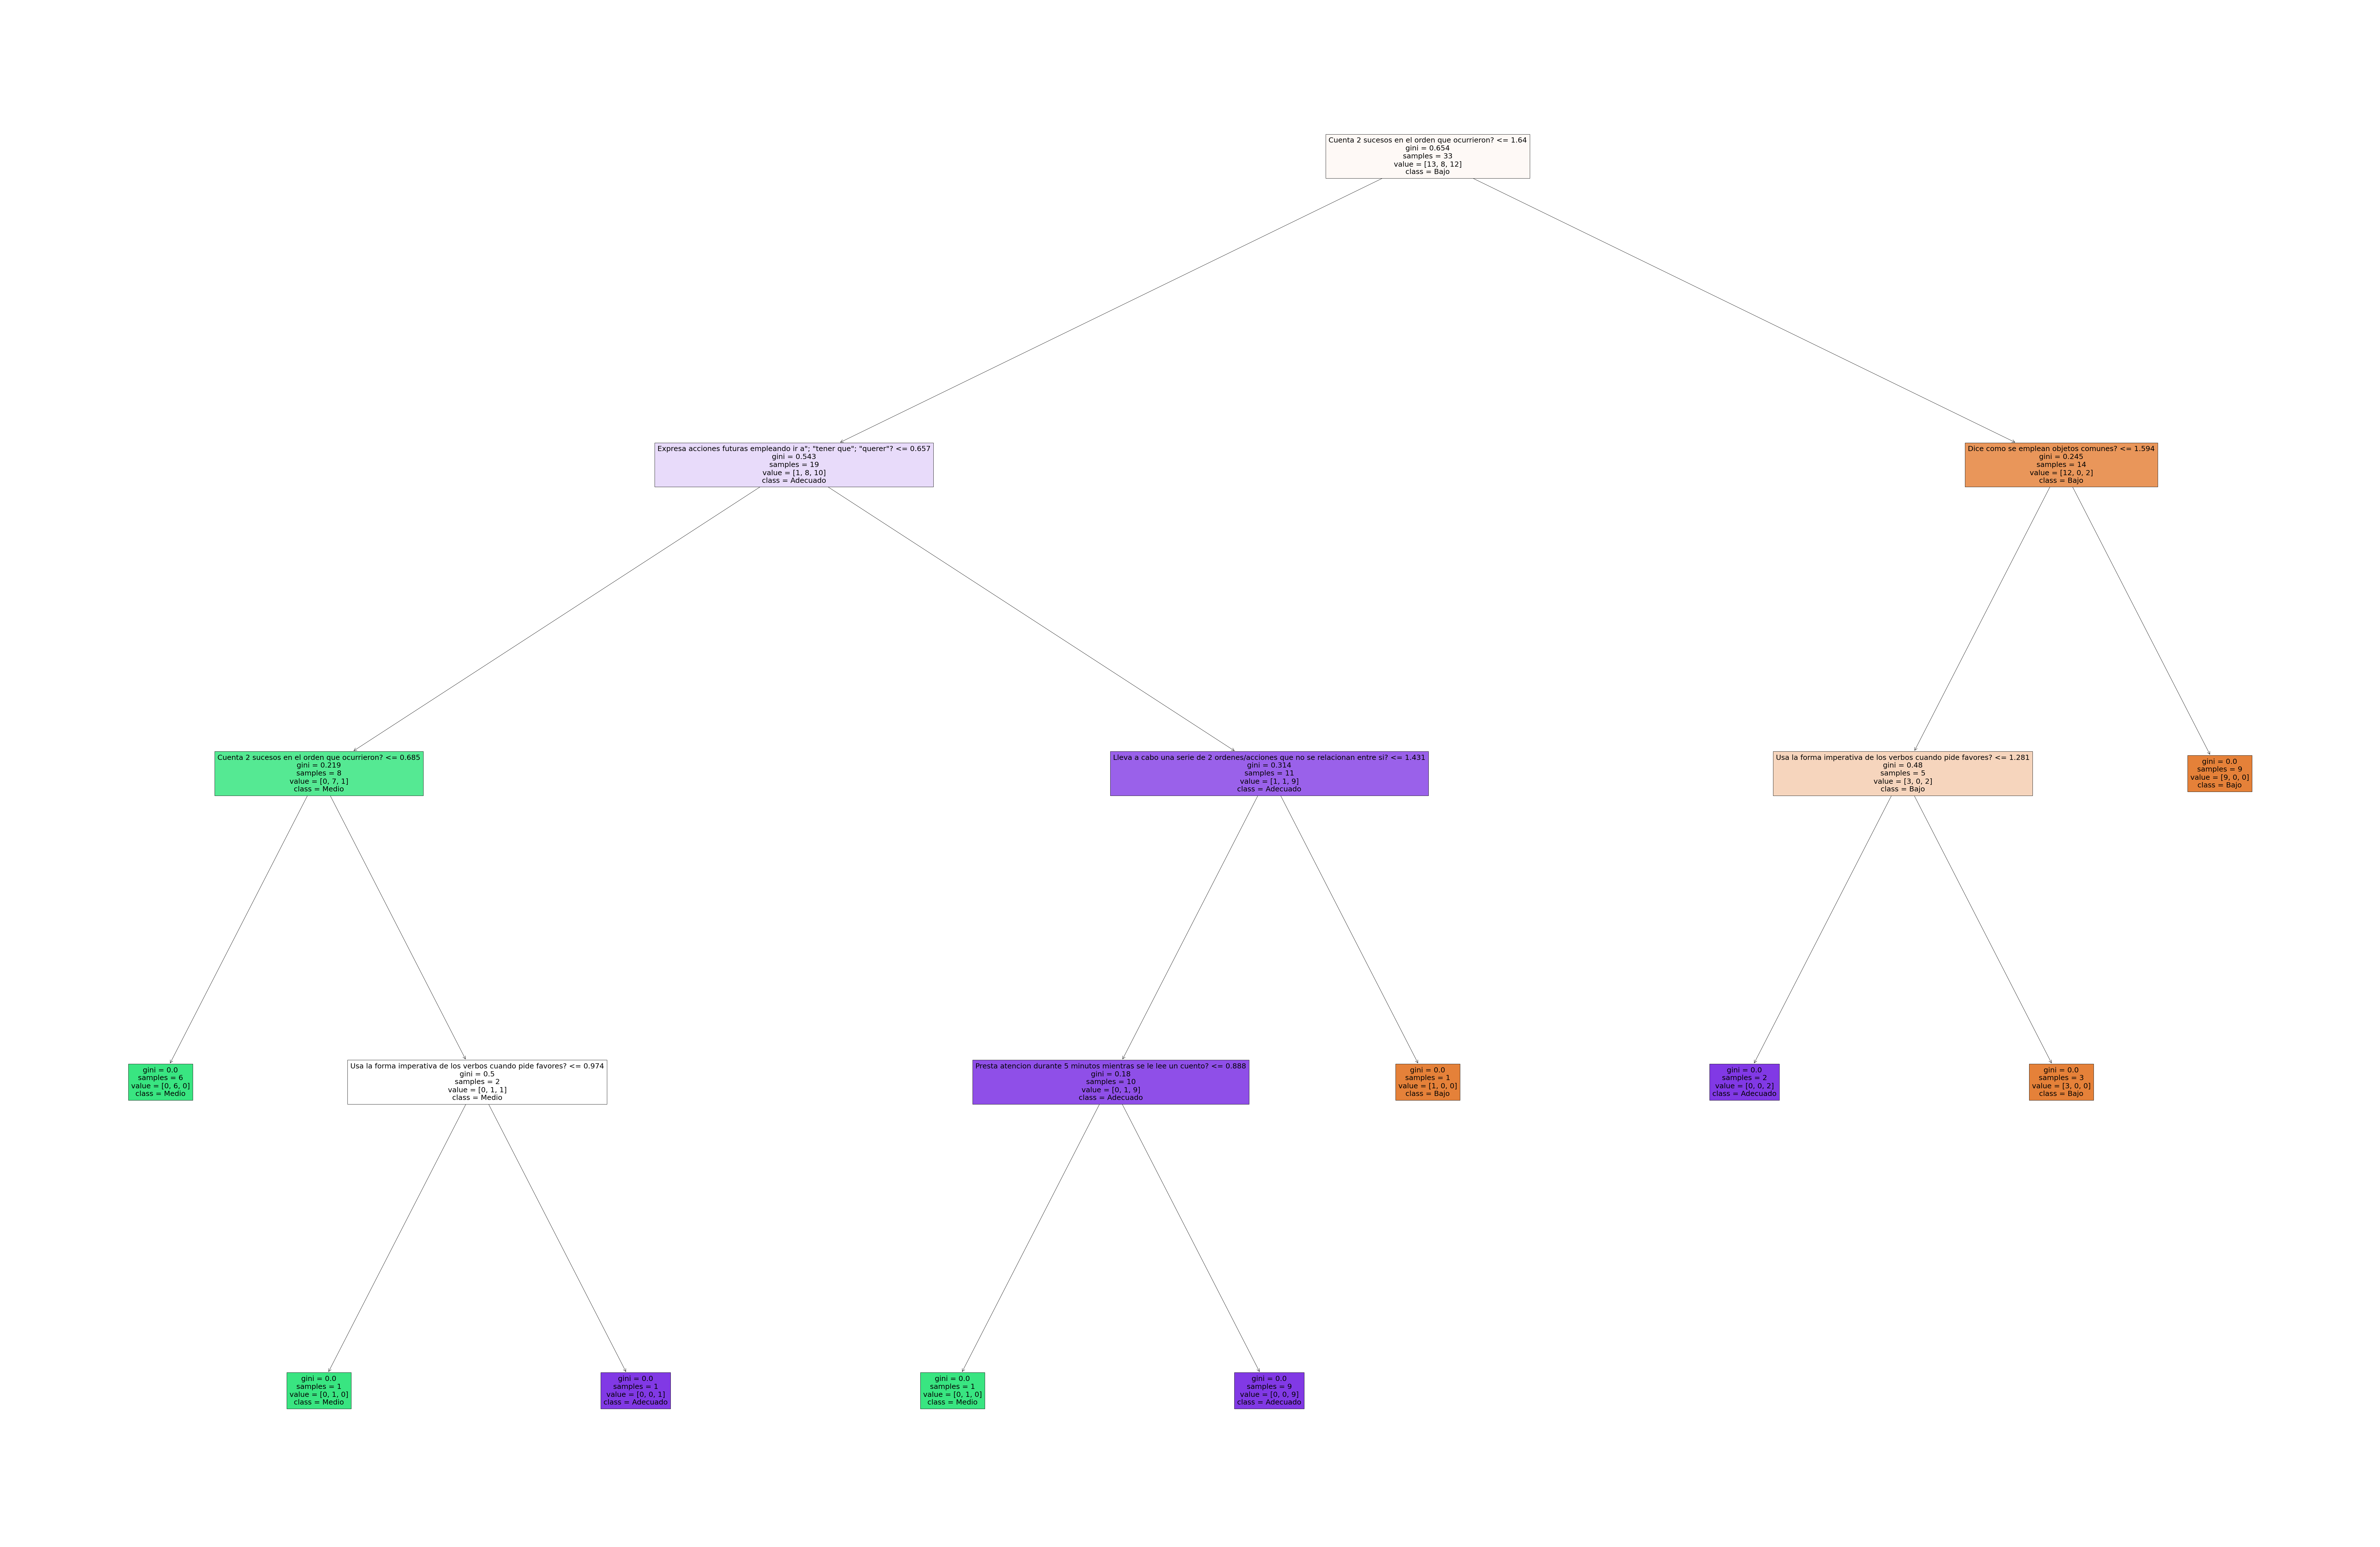

In [ ]:
fig = plt.figure(figsize = (150,100))
_ = tree.plot_tree(clf3,feature_names=df3.columns[:-1],class_names=target,filled = True)
fig.savefig("DecisionTree3.png")

In [ ]:
uploaded = files.upload()
df4 = pd.read_csv('Dataset4.csv')
df4.head()

Saving Dataset4.csv to Dataset4.csv


,Obedece una serie de ordenes de 3 etapas?,Demuestra comprension de los verbos reflexivos y los usa al hablar?,Puede encontrar un par de objetos/ilustraciones cuando se le pide?,Emplea el futuro al hablar?,Emplea oraciones compuestas?,Cuando se le pide; puede encontrar la parte de 'arriba' y la de 'abajo' de los objetos?,Emplea el condicional?,Puede nombrar cosas absurdas en una ilustracion?,Emplea las palabras 'hermano; hermana; abuelito; abuelita'?,Dice la ultima palabra en analogias opuestas?,Relata un cuento conocido sin la ayuda de ilustraciones?,En una imagen nombra el objeto que no pertenece a una clase determinada?,Dice si 2 palabras riman o no?,Dice oraciones complejas?,Dice si un sonido es 'fuerte' o 'suave'?,Clase
0,1,1,1,1,1,1,1,1,2,1,2,1,0,1,0,Medio
1,0,0,1,2,0,2,0,0,2,0,0,2,0,0,2,Medio
2,2,2,2,1,2,2,2,2,2,0,1,2,1,1,2,Adecuado
3,1,2,2,1,2,2,1,0,2,1,2,2,1,1,2,Adecuado
4,1,1,1,1,1,2,1,2,2,1,2,1,1,1,2,Adecuado


In [ ]:
X4 = df4.loc[:, df4.columns != 'Clase']
y4 = df4['Clase']

X4_shape = X4.shape[1]

target = ["Bajo", "Medio", "Adecuado"]

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size = 0.3)

In [ ]:
clf4 = tree.DecisionTreeClassifier(criterion= 'entropy', max_depth=10, splitter= 'random')
clf4.fit(X_train4, y_train4)

y_pred4 = clf4.predict(X_test4)
print("Acuracy2= ", clf4.score(X_test4,y_test4))

values4 = np.array([2,1,1,2,2,1,2,2,1,2,1,2,1,2,1]).reshape(1,-1)
val4 = clf4.predict(values4)
print(val4)

#params = {'criterion': ('gini', 'entropy'), 'splitter': ('best', 'random'), 'max_depth': np.arange(3,X4_shape)}
#bclf4 = GridSearchCV(clf4, params, scoring = 'accuracy',cv = 10)
#bclf4.fit(X_train4, y_train4)

Acuracy2=  0.8
['Adecuado']


In [ ]:
with gzip.open("4yearsmodel.pickle","wb") as file:
  pickle.dump(clf4,file)

In [ ]:
if os.path.exists("4yearsmodel.pickle"):
  print("Loading Trained Model")
  model_file = gzip.open('4yearsmodel.pickle','rb')
  model = pickle.load(model_file)

Loading Trained Model


In [ ]:
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [ ]:
df = pd.DataFrame(bclf4.cv_results_)
df = df[['param_criterion','param_max_depth','param_splitter','mean_test_score']].sort_values(by= 'mean_test_score', ascending = False)
print(df.head())
print(bclf4.best_params_)

   param_criterion param_max_depth param_splitter  mean_test_score
39         entropy              10         random         0.841667
44         entropy              13           best         0.816667
42         entropy              12           best         0.816667
11            gini               8         random         0.816667
40         entropy              11           best         0.791667
{'criterion': 'entropy', 'max_depth': 10, 'splitter': 'random'}


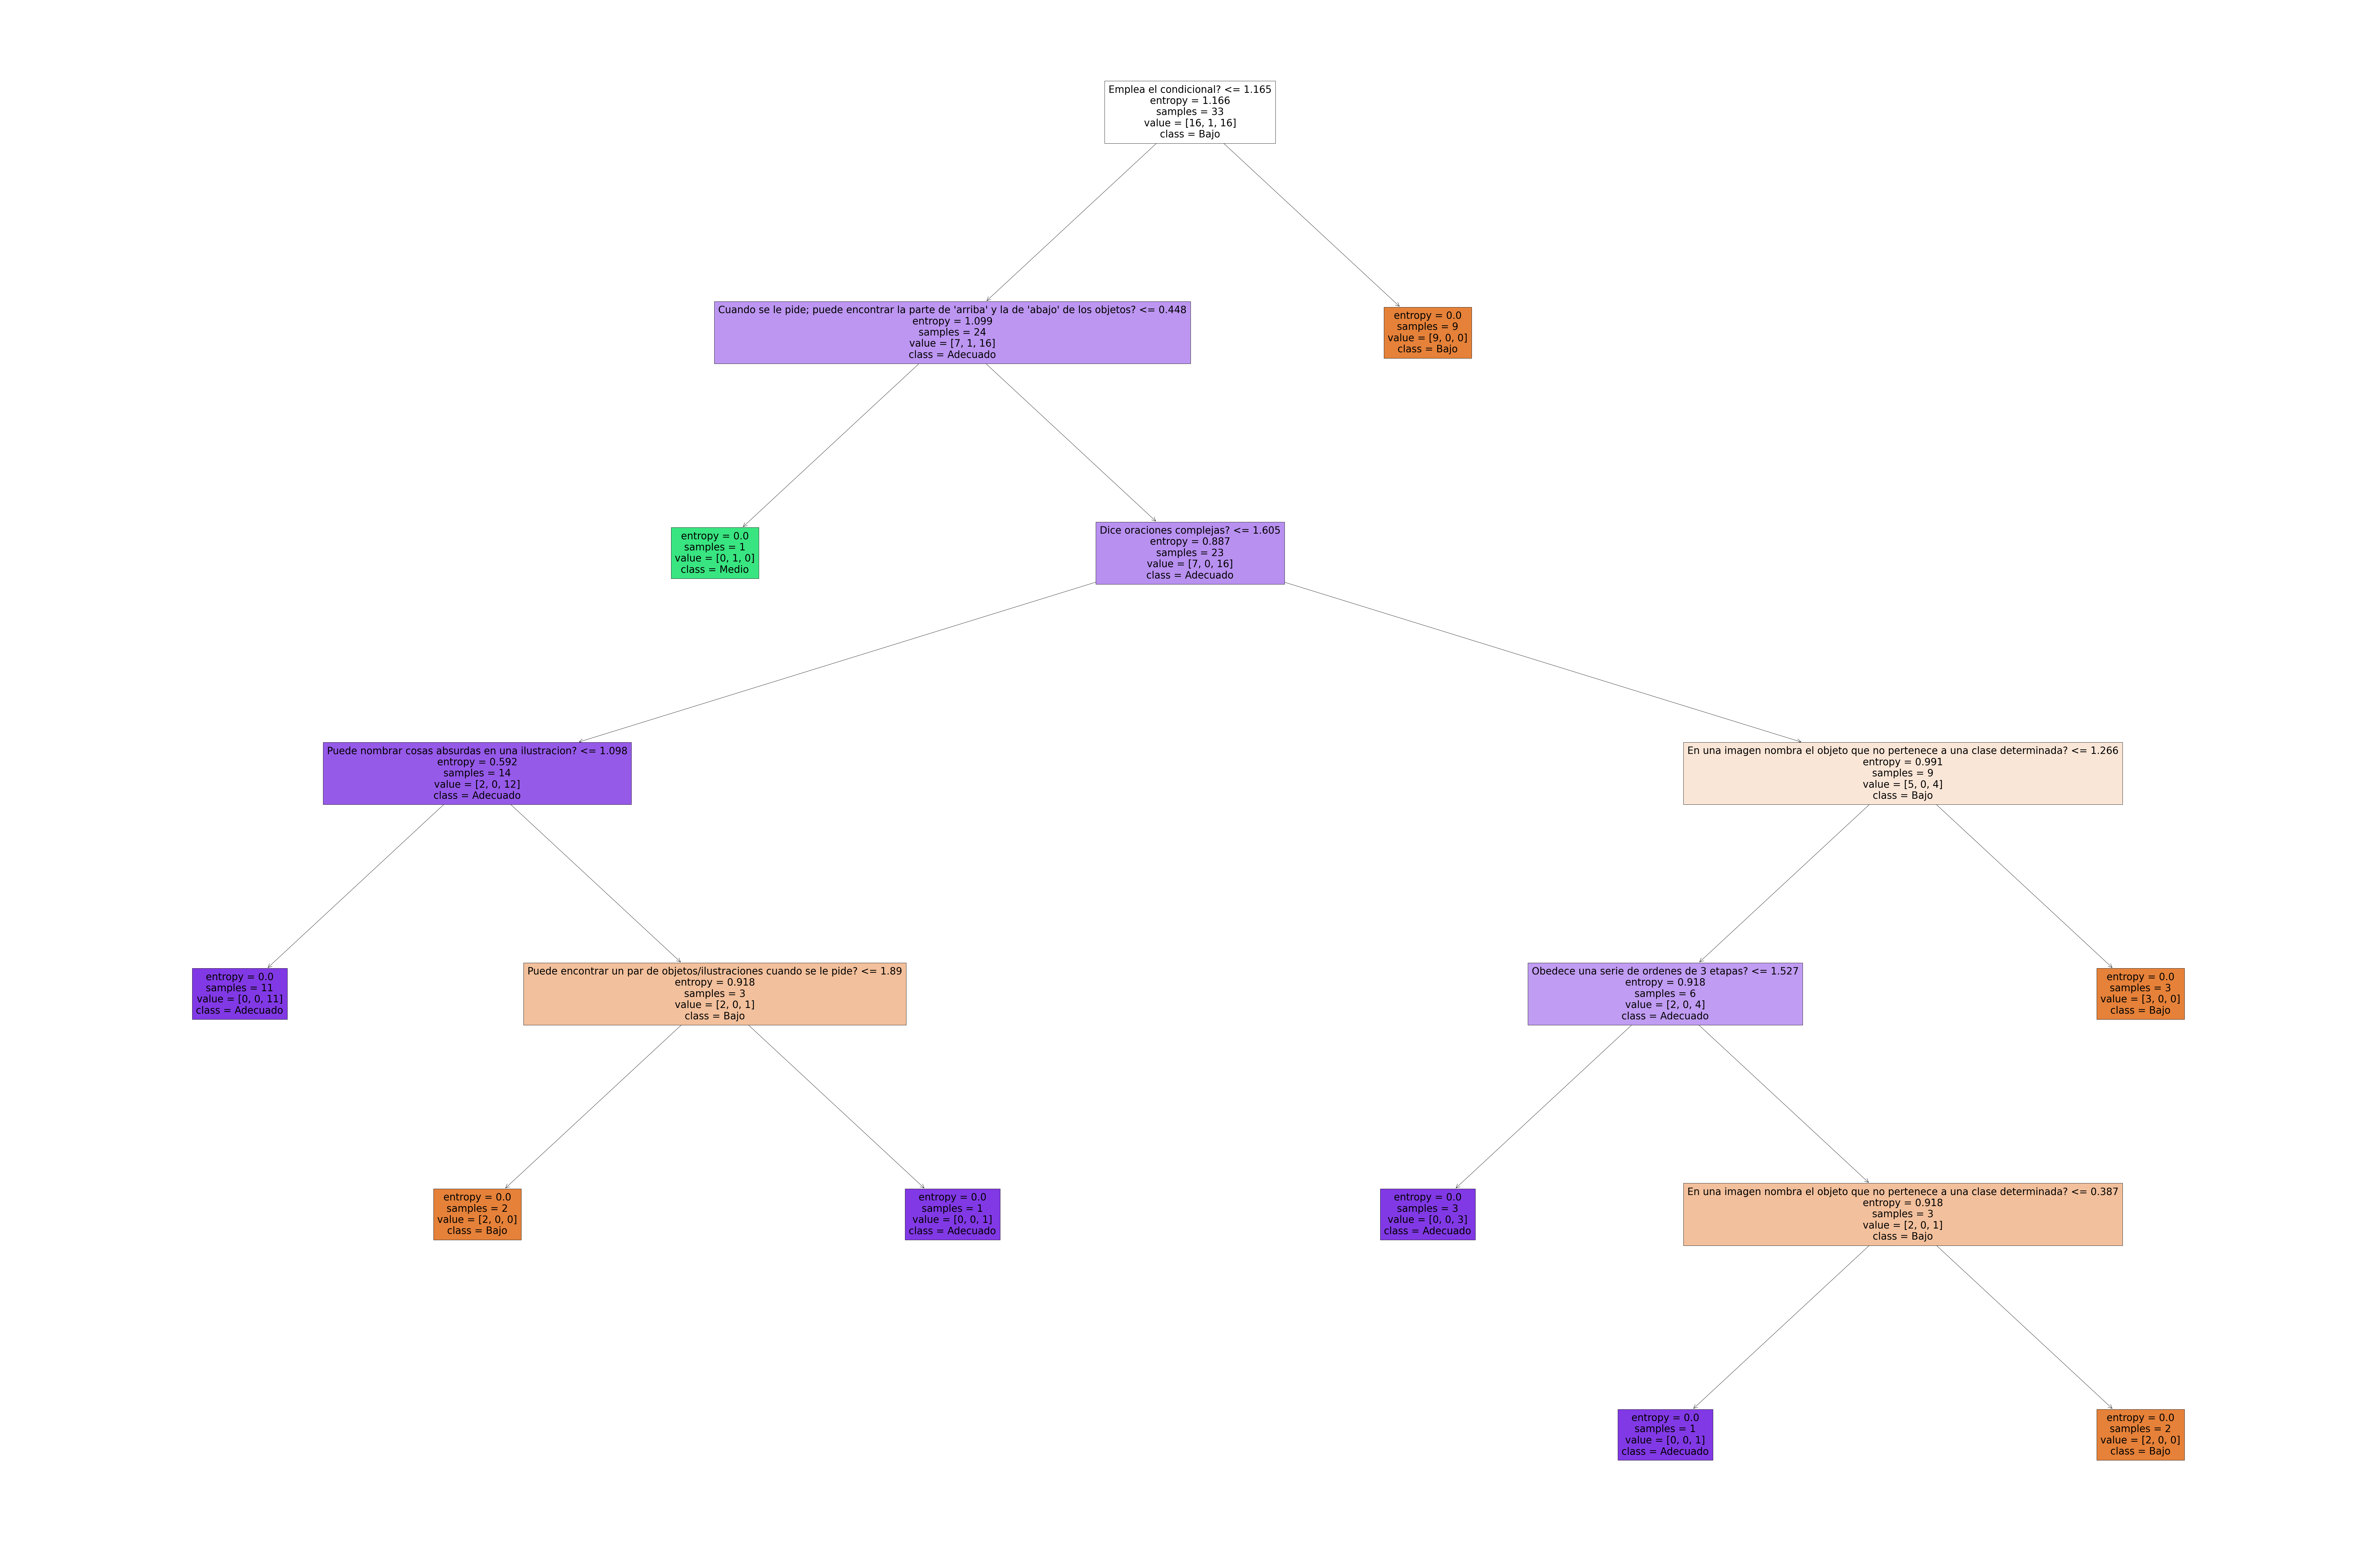

In [ ]:
fig = plt.figure(figsize = (150,100))
_ = tree.plot_tree(clf4,feature_names=df4.columns[:-1],class_names=target,filled = True)
fig.savefig("DecisionTree4.png")

In [ ]:
uploaded = files.upload()
df5 = pd.read_csv('Dataset5.csv')
df5.head()

Saving Dataset5.csv to Dataset5.csv


,Puede senalar algunos; muchos o varios objetos de un conjunto cuando se le pide?,Puede decir su direccion?,Dice el numero de su telefono?,Puede senalar el grupo que tiene mas; menos o pocos objetos?,Cuenta chistes sencillos?,Relata experiencias diarias?,Describe ubicacion o movimiento?,"Responde a preguntas de ""Por que?"" dando una explicacion?",Pone en orden las partes y relata un cuanto de 3 a 5 partes si se le dan estas desordenadas?,Define palabras?,"Responde acertadamente al pedirle: ""Dime lo opuesto de...""?","Responde a preguntas del estilo ""Que pasa si...?""?","Emplea ""ayer"" y ""manana"" de manera correcta?",Pregunta el significado de palabras nuevas o que desconoce?,Clase
0,2,1,1,2,2,2,2,2,2,2,2,2,2,2,Adecuado
1,2,1,1,2,2,2,2,2,2,2,2,2,1,2,Adecuado
2,2,1,0,1,1,2,2,1,1,1,1,1,1,1,Medio
3,1,0,0,1,1,2,1,1,1,1,1,1,1,1,Medio
4,2,2,2,2,1,2,1,1,2,1,1,2,2,2,Adecuado


In [ ]:
X5 = df5.loc[:, df5.columns != 'Clase']
y5 = df5['Clase']

X5_shape = X5.shape[1]

target = ["Bajo", "Medio", "Adecuado"]

X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size = 0.3)

In [ ]:
clf5 = tree.DecisionTreeClassifier(criterion= 'gini', splitter='random',max_depth=7)
clf5.fit(X_train5, y_train5)

y_pred5 = clf5.predict(X_test5)
print("Acuracy2= ", clf5.score(X_test5,y_test5))

values5 = np.array([2,1,1,2,1,2,2,1,2,1,2,1,0,1]).reshape(1,-1)
val5 = clf5.predict(values5)
print(val5)

#params = {'criterion': ('gini', 'entropy'), 'splitter': ('best', 'random'), 'max_depth': np.arange(3,X5_shape)}
#bclf5 = GridSearchCV(clf5, params, scoring = 'accuracy',cv = 10)
#bclf5.fit(X_train5, y_train5)

Acuracy2=  0.9444444444444444
['Medio']


In [ ]:
with gzip.open("5yearsmodel.pickle","wb") as file:
  pickle.dump(clf5,file)

In [ ]:
if os.path.exists("5yearsmodel.pickle"):
  print("Loading Trained Model")
  model_file = gzip.open('5yearsmodel.pickle','rb')
  model = pickle.load(model_file)

Loading Trained Model


In [ ]:
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [ ]:
df = pd.DataFrame(bclf5.cv_results_)
df = df[['param_criterion','param_max_depth','param_splitter','mean_test_score']].sort_values(by= 'mean_test_score', ascending = False)
print(df.head())
print(bclf5.best_params_)

   param_criterion param_max_depth param_splitter  mean_test_score
9             gini               7         random            0.925
15            gini              10         random            0.880
43         entropy              13         random            0.875
33         entropy               8         random            0.875
41         entropy              12         random            0.875
{'criterion': 'gini', 'max_depth': 7, 'splitter': 'random'}


In [ ]:
y_pred5 = clf5.predict(X_test5)
print("Accuracy= ", metrics.accuracy_score(y_test5,y_pred5))

values5 = np.array([2,1,1,2,1,2,2,1,2,1,2,1,0,1]).reshape(1,-1)
val5 = clf5.predict(values5)
print(val5)

Accuracy=  0.9444444444444444
['Medio']


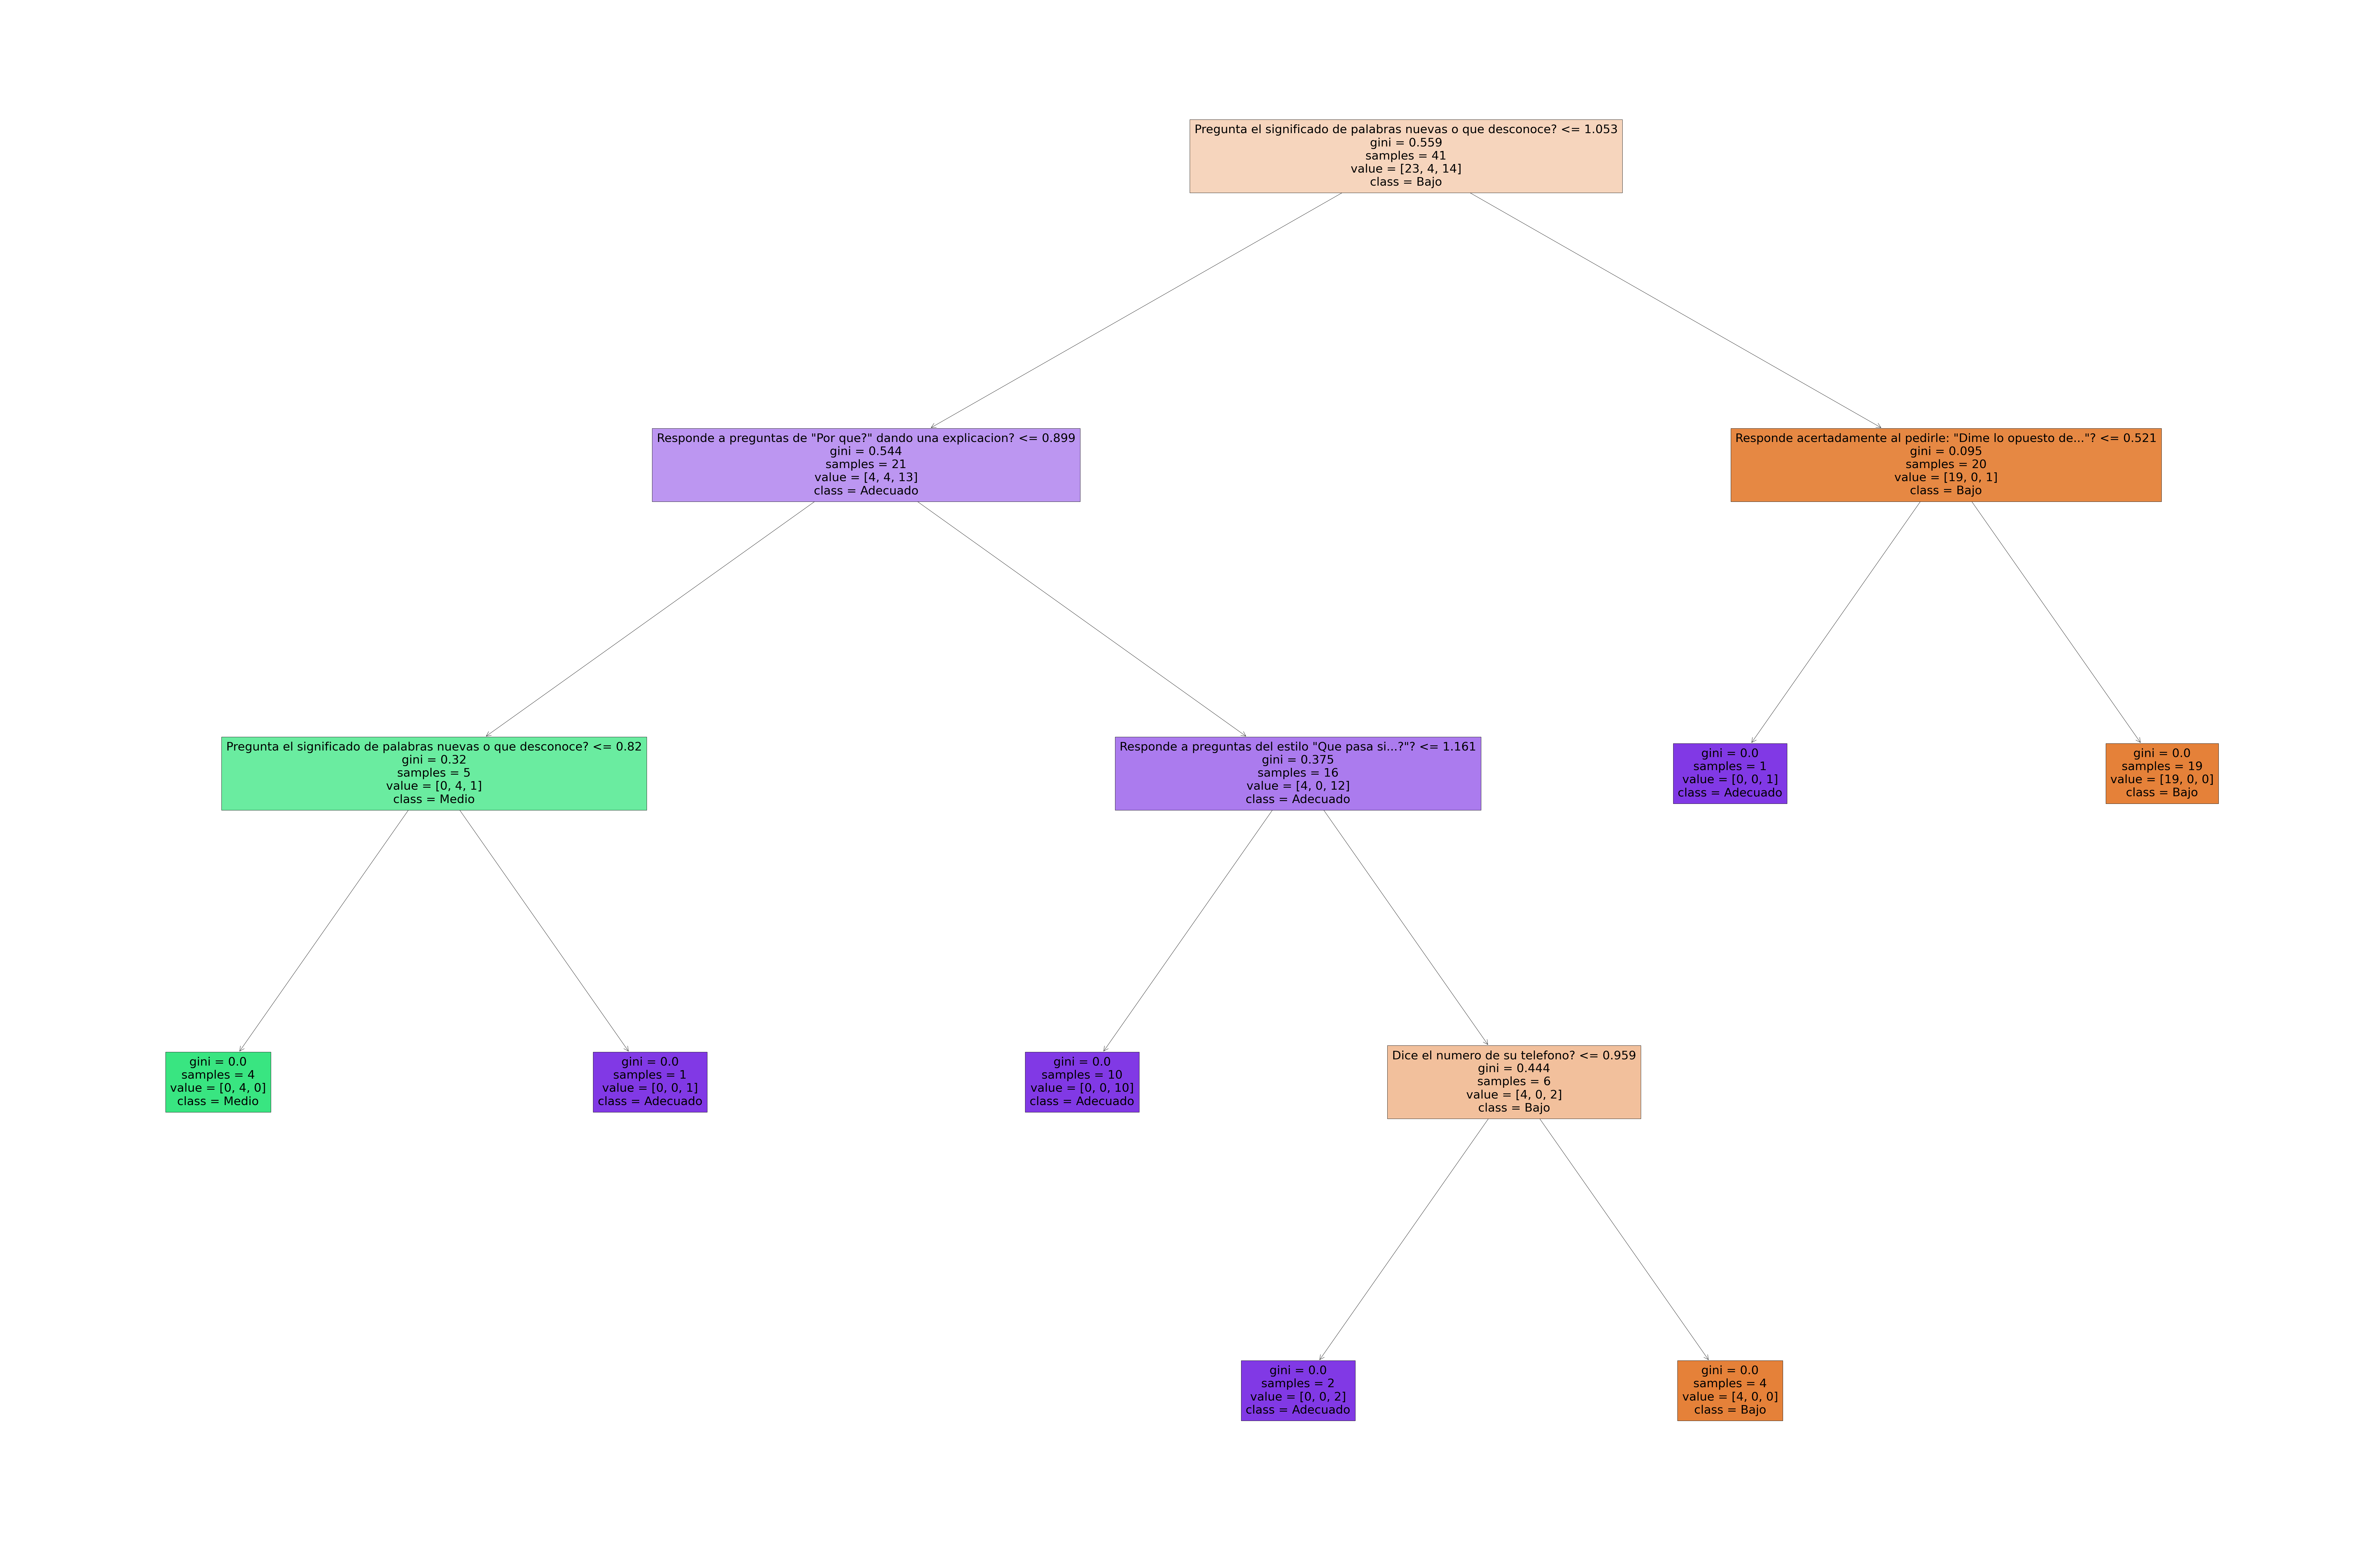

In [ ]:
fig = plt.figure(figsize = (150,100))
_ = tree.plot_tree(clf5,feature_names=df5.columns[:-1],class_names=target,filled = True)
fig.savefig("DecisionTree5.png")